In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig
import networkx as nx
from utils import load_nx_graph, create_adj_matrix, create_degree_dict, load_graph 

In [8]:
chimp_graph, human_graph = load_graph()

Total number of different edges : 756


In [3]:
print(f"Avg Degree Distribution of chimp connectome : {sum(chimp_graph.degree()) / len(chimp_graph.degree())}")
print(f"Avg Degree Distribution of human connectome : {sum(human_graph.degree()) / len(human_graph.degree())}")

Avg Degree Distribution of chimp connectome : 28.055555555555557
Avg Degree Distribution of human connectome : 30.5


In [4]:
c_degree_dict = create_degree_dict(chimp_graph)
h_degree_dict = create_degree_dict(human_graph)

sort_orders = sorted(c_degree_dict.items(), key=lambda x: x[1], reverse=True)
top_five = [(sort_orders[i]) for i in range(5)]
print(f"Top 5 Nodes according to vertex degree in chimpanzee : {top_five}")

sort_orders = sorted(h_degree_dict.items(), key=lambda x: x[1], reverse=True)
top_five = [(sort_orders[i]) for i in range(5)]
print(f"Top 5 Nodes according to vertex degree in human : {top_five}")

Top 5 Nodes according to vertex degree in chimpanzee : [('rOB', 71), ('lOB', 62), ('rFDdelta', 57), ('lFDdelta', 50), ('lIB', 48)]
Top 5 Nodes according to vertex degree in human : [('rPF', 59), ('lFE', 58), ('lPF', 58), ('rPEp', 52), ('rOB', 47)]


In [5]:
h_degree_list = list(human_graph.degree())
c_degree_list = list(chimp_graph.degree())

diff_degree = [(chimp_graph.vs[i]['label'].item(), h_degree_list[i] - c_degree_list[i]) for i in range(len(h_degree_list))]

sort_orders = sorted(diff_degree, key=lambda x: x[1], reverse=True)
top_five = [(sort_orders[i]) for i in range(5)]
print(f"Top 5 Nodes according to vertex degree differences in Humans : {top_five}")

sort_orders = sorted(diff_degree, key=lambda x: x[1])
top_five = [(sort_orders[i]) for i in range(5)]
print(f"Top 5 Nodes according to vertex degree differences in chimpanzee : {top_five}")


Top 5 Nodes according to vertex degree differences in Humans : [('lFE', 32), ('lPF', 32), ('rPF', 29), ('rFE', 19), ('lTE2', 18)]
Top 5 Nodes according to vertex degree differences in chimpanzee : [('rFDdelta', -39), ('lFDdelta', -30), ('rFDL', -28), ('lFDL', -26), ('rOB', -24)]


In [3]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Total number of different edges : 756
True


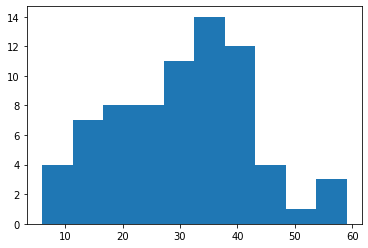

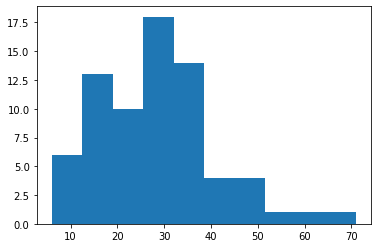

Text(0, 0.5, 'Frequency')

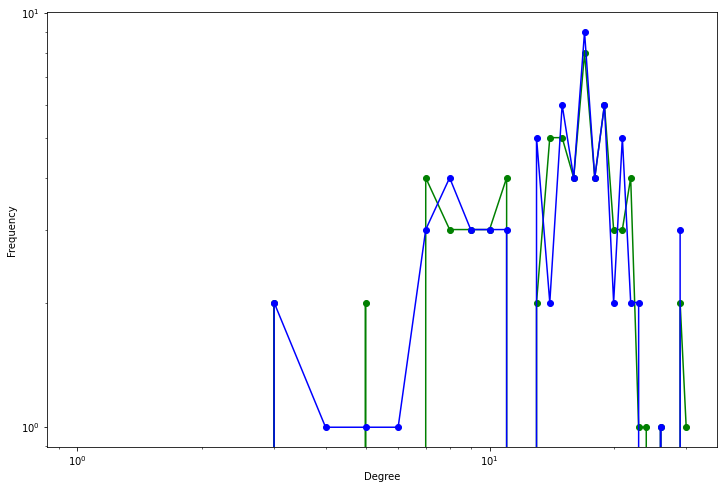

In [6]:
# print(human_graph.indegree())
# print(human_graph.outdegree())
# print(human_graph.degree())
chimp_graph, human_graph = load_nx_graph()
print(human_graph.is_directed())
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

# G = some networkx graph

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
    
plot_degree_dist(human_graph)
plot_degree_dist(chimp_graph)


in_degree_freq = degree_histogram_directed(human_graph, in_degree=True)
out_degree_freq = degree_histogram_directed(human_graph, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
      
# # c_degree_list = list(chimp_graph.degree())